In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
nobel = pd.read_csv("/Users/siddharthmalladi/Downloads/archive.csv")

In [4]:
nobel.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [10]:
nobel['Prize Share'].value_counts()
display()
nobel['Sex'].value_counts()
display()
nobel['Birth Country'].value_counts().head(8)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Name: Birth Country, dtype: int64

In [38]:
nobel['US_Born'] = nobel['Birth Country'] =='United States of America'
nobel['Decade'] = (np.floor(nobel['Year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('Decade', as_index=False)['US_Born'].mean()


In [19]:
nobel['US_Born'].mean()

0.2848297213622291

In [25]:
year_cat=nobel.groupby(['Year','Category'])['Laureate ID'].count().reset_index()


In [26]:
year_cat

,Year,Category,Laureate ID
0,1901,Chemistry,1
1,1901,Literature,1
2,1901,Medicine,1
3,1901,Peace,2
4,1901,Physics,1
...,...,...,...
574,2016,Economics,2
575,2016,Literature,1
576,2016,Medicine,1
577,2016,Peace,1


AttributeError: 'function' object has no attribute 'between'

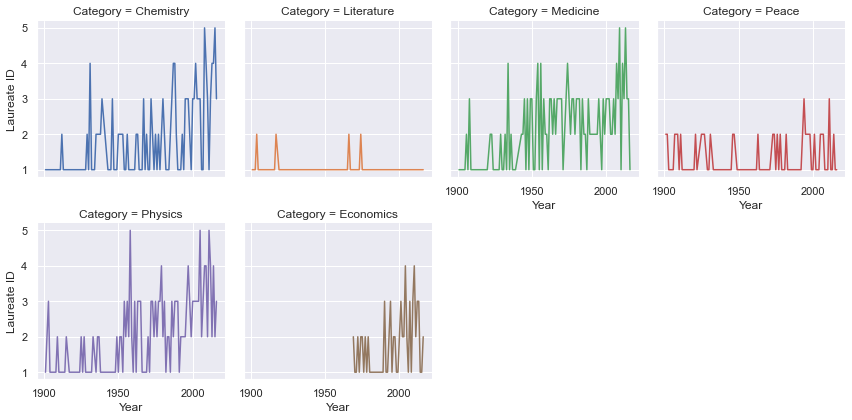

In [33]:
g = sns.FacetGrid(year_cat, col='Category', hue='Category', col_wrap=4, )
g= g.map(plt.plot,'Year','Laureate ID')
g = g.map(plt.fill.between,'Year','Laureate ID',alpha=0.2).set_titles("{col_name} Category")
g = g.set_titles("{col_name}")
plt.show()

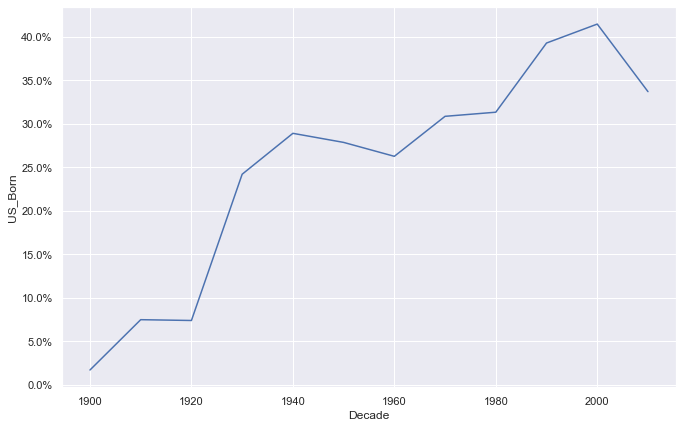

In [41]:
sns.set()
plt.rcParams['figure.figsize'] = [11,7]
ax = sns.lineplot(x=prop_usa_winners['Decade'],y=prop_usa_winners['US_Born'])
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))'category'
display()

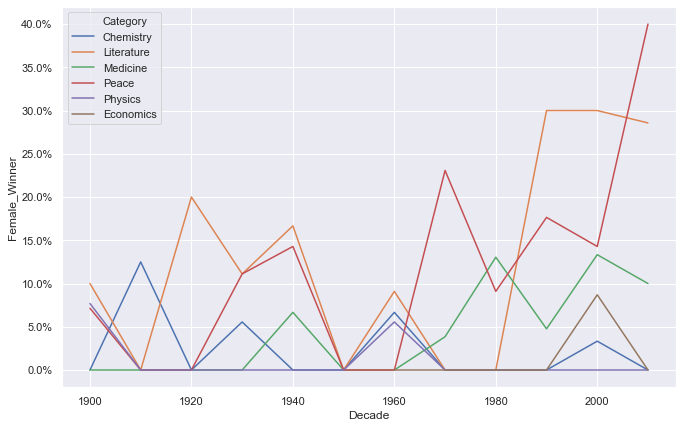

In [45]:
nobel['Female_Winner'] = nobel['Sex']=='Female'
prop_female_winners = nobel.groupby(['Decade','Category'],as_index=False)['Female_Winner'].mean()
ax = sns.lineplot(x='Decade',y='Female_Winner',hue='Category',data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [51]:
nobel.groupby('Full Name').filter(lambda group: len(group)>1).head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,US_Born,Decade,Female_Winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
